In [1]:
import networkx as nx
import matplotlib # if abbreviating this, use "as mpl"
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import pickle
%matplotlib notebook

In [2]:
### Nodes ###
## 1.1    Open node DataFrames
## 1.1.1. All nodes
## 1.1.2. Subnetwork connection nodes
## 1.1.3. Intermediate nodes
## 1.1.4. Subnetwork "nodes"

## 1.2    Organisation of the DataFrames
## 1.2.1. del_coord, DataFrame with deleting entries
## 1.2.2. Deleting of nodes 
## 1.2.3. One DataFrame with all nodes

In [3]:
coord_orig = pd.read_csv('../preprocesses/section_data/net_coord.csv')
coord = coord_orig[["NodeID","CoordX", "CoordY"]].copy()

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(coord)
  
### What am I doing? ###
#
#open data file about information of all nodes, using only the coordinates

                                 NodeID         CoordX         CoordY
0                             201827771  912872.500000  450983.331000
1                     42784779-SPOTLOAD  553936.808426  146115.680388
2                              42933083  888887.500000  326986.330950
3                              52894498  804812.500000  578983.330950
4                              42805981  554167.347000  145823.926000
5                              42875178  819443.716072  539095.272274
6                              52061191  824993.716072  311092.272274
7                     42762171-SPOTLOAD  554234.887258  145830.116397
8                              42773422  554224.880000  146486.816000
9                     42774787-SPOTLOAD  554004.786862  145857.488915
10                             42800598  554172.665000  145749.726000
11                             42826835  554213.574000  146132.659000
12                             42891158  823233.716072  579095.272274
13                  

In [4]:
### Nodes ###

subnetwork_connections = pd.read_csv('../preprocesses/section_data/result_subnetwork_connections.csv')

subnetwork_connections = subnetwork_connections[["NodeID", "ConnectorCoordX", "ConnectorCoordY"]].copy()

subnetwork_connections = subnetwork_connections.rename(index=str, columns={"ConnectorCoordX": "CoordX", "ConnectorCoordY": "CoordY"})

subnetwork_connections['NodeID'] = subnetwork_connections['NodeID'].astype(str)


with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(subnetwork_connections)


### What am I doing? ###
#
# open file about the subnetwork_connection nodes, changing column names of the coordinates,
# so it fit with the DataFrame of the node coordinates

        NodeID         CoordX         CoordY
0     52878178  553852.639409  145587.960834
1     52878186  553855.073635  145591.289218
2     52878194  553858.725239  145596.282156
3     53071194  553945.141333  145628.150687
4     53071202  553950.054696  145627.476492
5     53071210  553950.894055  145628.785481
6     53071218  553951.144215  145629.175608
7     53071226  553952.233942  145630.875048
8     53071234  553946.251093  145629.881368
9     53071242  553948.454457  145633.317536
10    53071250  553947.360536  145631.611556
11    53077066  554238.333159  145588.590133
12    53077074  554238.283626  145590.637389
13    53077082  554238.234073  145592.685480
14    52061191  553606.508906  146380.699106
15    52061201  553613.215165  146384.252988
16    52061211  553613.509197  146385.130729
17    52061221  553612.298271  146381.515883
18    52946922  554142.290993  145673.075936
19    52946930  554144.104265  145672.003338
20    52946938  554138.671725  145675.216827
21    5294

In [5]:
### Nodes ###


intermediate_nodes = pd.read_csv('../preprocesses/section_data/intermediate_coords_while_new.csv')


intermediate_nodes = intermediate_nodes[["SectionID", "CoordX", "CoordY"]].copy()

intermediate_nodes = intermediate_nodes.rename(index=str, columns={"SectionID": "NodeID"})

intermediate_nodes['NodeID'] = intermediate_nodes['NodeID'].astype(str)


with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(intermediate_nodes)
    
### What am I doing? ###
#
# open file about intermediate nodesm with their SectionID, SeqNumber and each coordinates
#
# Wikipedia: In such a network the source and destination cannot communicate to each other directly because
#            the distance between the source and destination is greater than the transmission range of both of them, 
#            hence the need for intermediate node(s) to relay.

             NodeID         CoordX         CoordY
0      160232402(0)  554220.352000  146210.115000
1       42559906(0)  886902.500000  437000.000000
2       43966944(0)  554328.299000  146566.836000
3       43966944(1)  554335.999000  146566.836000
4       43966944(2)  554336.356000  146574.455000
5       43966944(3)  554331.866000  146575.979000
6       43966944(4)  554324.583000  146577.692000
7       43966944(5)  554319.233000  146578.554000
8       43966944(6)  554313.943000  146579.139000
9       43966944(7)  554306.375000  146579.139000
10      43966944(8)  554299.766000  146578.963000
11      43966944(9)  554296.332000  146578.641000
12     43966944(10)  554291.171000  146577.829000
13     43966944(11)  554283.304000  146576.762000
14     43966944(12)  554279.030000  146576.302000
15      43968073(0)  554230.035000  145709.713000
16      43968073(1)  554231.949000  145718.190000
17      43968073(2)  554234.232000  145717.674000
18      43968073(3)  554241.213000  145716.097000


In [6]:
intermediate_nodes_2 = intermediate_nodes[intermediate_nodes['CoordX'] < 555000]
intermediate_nodes_2
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(intermediate_nodes_2)

             NodeID         CoordX         CoordY
0      160232402(0)  554220.352000  146210.115000
2       43966944(0)  554328.299000  146566.836000
3       43966944(1)  554335.999000  146566.836000
4       43966944(2)  554336.356000  146574.455000
5       43966944(3)  554331.866000  146575.979000
6       43966944(4)  554324.583000  146577.692000
7       43966944(5)  554319.233000  146578.554000
8       43966944(6)  554313.943000  146579.139000
9       43966944(7)  554306.375000  146579.139000
10      43966944(8)  554299.766000  146578.963000
11      43966944(9)  554296.332000  146578.641000
12     43966944(10)  554291.171000  146577.829000
13     43966944(11)  554283.304000  146576.762000
14     43966944(12)  554279.030000  146576.302000
15      43968073(0)  554230.035000  145709.713000
16      43968073(1)  554231.949000  145718.190000
17      43968073(2)  554234.232000  145717.674000
18      43968073(3)  554241.213000  145716.097000
19      43968073(4)  554242.769000  145721.691000


In [7]:
### DataFrame for the coordinates of the nodes of the subnetworks, created in Subnetwork_recreation

subnetworks_nodes_orig = pd.read_csv('subnetworks_nodes_new.csv')

subnetworks_nodes = subnetworks_nodes_orig[["NodeID", "CoordX", "CoordY"]].copy()
subnetworks_nodes["NodeID"] = subnetworks_nodes["NodeID"].astype(str)

subnetworks_nodes.loc[subnetworks_nodes['NodeID'].str.contains('42941227'), 'CoordX'] = 554440

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(subnetworks_nodes)


                  NodeID    CoordX    CoordY
0               42901267  553992.0  146424.0
1               42901266  553992.0  146424.0
2               52107520  554039.0  146339.0
3               52107552  554039.0  146339.0
4               52107528  554039.0  146339.0
5               93848381  554039.0  146339.0
6               52889626  553992.0  146424.0
7               52889610  553992.0  146424.0
8               52107504  554039.0  146339.0
9               52107544  554039.0  146339.0
10              93848443  554039.0  146339.0
11              52889602  553992.0  146424.0
12              42951834  554322.0  146260.0
13              42876386  553981.0  145938.0
14              42881432  553981.0  145938.0
15              42965808  554051.0  145897.0
16              42974432  553856.0  145763.0
17             175587519  554051.0  145897.0
18              42968944  553981.0  145938.0
19              42948115  554240.0  146124.0
20              84817283  554322.0  146260.0
21        

In [8]:
headnodes = pd.read_csv('../preprocesses/section_data/headnodes.csv')


headnodes = headnodes[["NodeID", "NetworkID"]].copy()

headnodes['NodeID'] = headnodes['NodeID'].astype(str)
headnodes

,NodeID,NetworkID
0,193621144,COPET-32-NI193621143
1,42890827,COPET-47-NI52034654-GUTENBERG-TR5597
2,52034725,COPET-28-NI52034724
3,42975166,COPET-28-NI52034724-THÉÂTRE-TR5274
4,42889208,COPET-47-NI52034654-CHEMIN VERT-TR6417
5,42948116,COPET-32-NI193621143-MOULINS VEVEYSE-TR5806
6,88867752,COPET-28-NI52034724-GUINGUETTE 2-TR7470
7,42875734,COPET-66-NI52034754-GUISAN-TR5198
8,175587451,COPET-32-NI193621143-STEINLEN-TR7010
9,148912587,COPET-32-NI193621143-ENTREPÔTS-TR7592


In [9]:
### Nodes ###

### Putting the "wrong" coordinates in better position (it suckz, since it takes forever)

#intermediate_nodes_2 = intermediate_nodes.copy()
#for i,row in intermediate_nodes.iterrows():
#    if intermediate_nodes['CoordX'][i] >=555000:
#        intermediate_nodes_2['CoordX'][i] = intermediate_nodes['CoordX'][i] - 255000
#        intermediate_nodes_2['CoordY'][i] = intermediate_nodes['CoordY'][i] - 272000
#        print('change im node ' +str(i))
#    else:
#        continue

###
del_coordX = coord[coord["CoordX"] >= 555000]

del_coord = del_coordX[del_coordX["CoordY"] >= 150000]

del_coord = del_coord[~del_coord['NodeID'].isin(subnetwork_connections['NodeID'])] # putting nodes from the deleting list, that are in the subnetwork dataframe
del_coord = del_coord[~del_coord['NodeID'].isin(subnetworks_nodes['NodeID'])] 
del_coord = del_coord[~del_coord['NodeID'].isin(headnodes['NodeID'])] 

#del_coord = pd.DataFrame(del_coord["NodeID"].reset_index(drop=True))
del_coord["NodeID"] = del_coord["NodeID"].astype(str)

#del_coord # still 105 nodes without correct coordinates

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(del_coord)
    
### What am I doing? ###
#
# Creating a table (del_coord) with all the nodes that are out of the considered intervall
# and have therefore wrong coordinates. 
# del_coord_section contains only the nodes, where the coordinates are not "re-createable"


Empty DataFrame
Columns: [NodeID, CoordX, CoordY]
Index: []


In [10]:
### Nodes ###

in_coord = coord[~coord['NodeID'].isin(del_coord['NodeID'])].copy()

#with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
#    print(in_coord.reset_index(drop=True))

### saving nodes for pandapower


intermediate_nodes_sep = intermediate_nodes_2.rename(index=str, columns={"SectionID": "NodeID"})

subnetworks_nodes = subnetworks_nodes[subnetworks_nodes['NodeID'].isin(in_coord['NodeID'])]
#in_coord = in_coord[~in_coord['NodeID'].isin(subnetworks_nodes['NodeID'])]

in_coord_2 = in_coord[in_coord["CoordX"] <= 555000] # deleting nodes with the old "wrong" coordinates 
in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(subnetworks_nodes['NodeID'])]
in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(subnetwork_connections['NodeID'])]
#in_coord_2 = in_coord_2[~in_coord_2['NodeID'].isin(intermediate_nodes_sep['NodeID'])]

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(in_coord_2)
 
## Creating csv for the pandapower file    

#in_coord_2.to_csv(r'network_data/nodes_with_im.csv', header=True, index=None, mode='a')
#subnetwork_connections.to_csv(r'network_data/sub_con_nodes.csv', header=True, index=None, mode='a')
#intermediate_nodes_sep.to_csv(r'network_data/intermediate_nodes_sep.csv', header=True, index=None, mode='a')
#subnetworks_nodes.to_csv(r'network_data/subnet_nodes.csv', header=True, index=None, mode='a')



### What am I doing ###
#
# New table of Nodes with their coordinates, which contains only the "correct" nodes, by deleting every entry that is in
# the table of "wrong" nodes.

                                 NodeID         CoordX         CoordY
1                     42784779-SPOTLOAD  553936.808426  146115.680388
4                              42805981  554167.347000  145823.926000
7                     42762171-SPOTLOAD  554234.887258  145830.116397
8                              42773422  554224.880000  146486.816000
9                     42774787-SPOTLOAD  554004.786862  145857.488915
10                             42800598  554172.665000  145749.726000
11                             42826835  554213.574000  146132.659000
13                             42684822  554202.296000  145812.842000
14                             42692306  553907.670000  146018.676000
15                             42793458  554020.032000  145979.088000
18                             42677448  553987.234000  146063.703000
23                            160381938  553708.694000  145882.643000
24                             42689099  554258.868000  145618.281000
25                  

In [11]:
### Nodes ###


frames = [in_coord,subnetwork_connections, intermediate_nodes_sep,subnetworks_nodes] 
in_coord = pd.concat(frames)

#in_coord = in_coord[in_coord["CoordX"] <= 555000] # deleting nodes with the old "wrong" coordinates 
in_coord["NodeID"] = in_coord["NodeID"].astype(str)


with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(in_coord.reset_index(drop=True))

### What am I doing? ###
#
# Connect the tables of the nodes and subnetwork nodes: the subnetwork nodes are now twice in the list, one time with
# "wrong" coordinates and one time with the correct ones.
# Intermediate_nodes are put in the node coordinate table, to be displayed in the graph

                                 NodeID         CoordX         CoordY
0                             201827771  912872.500000  450983.331000
1                     42784779-SPOTLOAD  553936.808426  146115.680388
2                              42933083  888887.500000  326986.330950
3                              52894498  804812.500000  578983.330950
4                              42805981  554167.347000  145823.926000
5                              42875178  819443.716072  539095.272274
6                              52061191  824993.716072  311092.272274
7                     42762171-SPOTLOAD  554234.887258  145830.116397
8                              42773422  554224.880000  146486.816000
9                     42774787-SPOTLOAD  554004.786862  145857.488915
10                             42800598  554172.665000  145749.726000
11                             42826835  554213.574000  146132.659000
12                             42891158  823233.716072  579095.272274
13                  

In [12]:
### 2. Section ###
### 2.1.   Open Section DataFrames
### 2.1.1. Sections
### 2.1.2. Sections between intermediate nodes
### 2.2.   Organisation of sections
### 2.2.1. Deleting sections to not existing nodes
### 2.2.2. Creating on DataFrame for all section



In [13]:
### Transformer sections

transformer = pd.read_csv('network_data/transformer_combined.csv')

transformer = transformer[["SectionID" , "FromNodeID", "DeviceNumber", "KVA", "KVLLprim", "KVLLsec"]].copy()

transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(int)
transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(str)

transformer_mid_low_voltage = transformer[transformer['KVLLsec'] == 0.42]
transformer_10_to_04 = transformer_mid_low_voltage[transformer_mid_low_voltage['KVLLprim'] == 10.6]
transformer_21_to_04 = transformer_mid_low_voltage[transformer_mid_low_voltage['KVLLprim'] == 21.0]

transformer_mid_mid_voltage = transformer[transformer['KVLLsec'] == 10.6]

transformer = transformer.rename(index=str, columns={"DeviceNumber": "ToNodeID"})

In [14]:
### Section ###

section_orig = pd.read_csv('../preprocesses/section_data/result_section_better.csv')

section = section_orig[["SectionID", "FromNodeID", "ToNodeID"]].copy()

#section = section.rename(index=str, columns={"": "", "": ""})

section['SectionID'] = section['SectionID'].astype(str)
section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(section)

### What am I doing? ###
#
# Table about the connections of each nodes: sections.

                              SectionID FromNodeID  \
0                              42571222   42901266   
1                              42533575   42890834   
2                              43939209   42787380   
3                              43825506   42698357   
4                              43971553   42703621   
5                              94588448   52857530   
6                     42783662-SPOTLOAD   42783662   
7                              43895417   52889602   
8                              42533570   42890835   
9                              43906026   42785340   
10                             43939204   42660293   
11                    42787380-SPOTLOAD   42787380   
12                             93849829   93848443   
13                             43884803   42686073   
14                             42571224   42901268   
15                    42769314-SPOTLOAD   42769314   
16                             52107522   42890831   
17                          

In [15]:
intermediate_connections = pd.read_csv('../preprocesses/section_data/intermediate_nodes_new.csv')

intermediate_connections = intermediate_connections[["SectionID", "FromNodeID", "ToNodeID"]].copy()
intermediate_connections['SectionID'] = intermediate_connections['SectionID'].astype(str)
intermediate_connections['FromNodeID'] = intermediate_connections['FromNodeID'].astype(str)
intermediate_connections['ToNodeID'] = intermediate_connections['ToNodeID'].astype(str)

intermediate_connections_2 = intermediate_connections[intermediate_connections['FromNodeID'].isin(in_coord['NodeID'])]
intermediate_connections = intermediate_connections_2[intermediate_connections_2['ToNodeID'].isin(in_coord['NodeID'])] 

intermediate_connections = intermediate_connections[["SectionID", "FromNodeID", "ToNodeID"]].copy()

intermediate_connections = intermediate_connections.reset_index()

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(intermediate_connections)


### What am I doing? ###
#
# csv file about all intermediate nodes. Change to strings for later comparison.
# Intermediate Nodes that appear more than once are deleted, have to check where they come from! 

      index  SectionID     FromNodeID       ToNodeID
0         2   43939209       42787380    43939209(0)
1         3   43939209    43939209(0)       42687308
2         4   43971553       42703621    43971553(0)
3         5   43971553    43971553(0)    43971553(1)
4         6   43971553    43971553(1)    43971553(2)
5         7   43971553    43971553(2)    43971553(3)
6         8   43971553    43971553(3)    43971553(4)
7         9   43971553    43971553(4)       42694044
8        10   94588448       52857530    94588448(0)
9        11   94588448    94588448(0)    94588448(1)
10       12   94588448    94588448(1)    94588448(2)
11       13   94588448    94588448(2)       94588294
12       14   43895417       52889602    43895417(0)
13       15   43895417    43895417(0)    43895417(1)
14       16   43895417    43895417(1)       42697592
15       19   43906026       42785340    43906026(0)
16       20   43906026    43906026(0)       42692978
17       21   43939204       42660293    43939

In [16]:
section = section[~section['SectionID'].isin(intermediate_connections['SectionID'])]

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(section_pre)

### What am I doing? ###
#
# Sections that are cut into parts with intermediate nodes are deleted from the section dataframe.

In [17]:
frames = [section, intermediate_connections,transformer]
section = pd.concat(frames)

In [18]:

section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

#test_section = section
section = section[~section['FromNodeID'].isin(del_coord['NodeID'])]

section = section[~section['ToNodeID'].isin(del_coord['NodeID'])]

section_3 = section.reset_index(drop=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(section_3) 

section_3.to_csv(r'network_data/sectionX.csv', header=True, index=None, mode='a')


test_section = section_orig[~section_orig['ToNodeID'].isin(section_3['ToNodeID'])]
test_section.reset_index

test_section # If I am not wrong, no sections are deleted


### What am I doing? ###
#
# Deleting the sections between Nodes that are out of the considered intervall, with the table del_coord,
# for both: the FromNodeID and the ToNodeID. 

,SectionID,FromNodeID,FromNodeIndex,ToNodeID,ToNodeIndex,Phase,ZoneID,SubNetworkId,EnvironmentID


In [19]:
#DG = nx.DiGraph()
DG = nx.Graph()

### What am I doing? ###
#
# Creating a directed graph

In [20]:
pos = {}
pos = {row["NodeID"]: (row["CoordX"],row["CoordY"]) for _,row in in_coord.iterrows()}

node_spotload = in_coord[in_coord["NodeID"].str.contains("SPOTLOAD")]
node_pv = in_coord[in_coord["NodeID"].str.contains("PHOTOVOLTAIQUE")]
node_subn = in_coord[in_coord['NodeID'].isin(subnetwork_connections['NodeID'])]
node_interm_check = intermediate_nodes_sep[intermediate_nodes_sep['NodeID'].str.contains( "[\(][0-9]*[\)]" )]
node_interm = in_coord[in_coord['NodeID'].isin(node_interm_check['NodeID'])]
node_subnetwork = in_coord[in_coord['NodeID'].isin(subnetworks_nodes['NodeID'])]

frames = [node_spotload, node_pv, node_subn, node_interm,node_subnetwork ]
node_spec = pd.concat(frames)

node_rest = in_coord[~in_coord["NodeID"].isin(node_spec)]


color_spotload = {}
color_spotload = {row["NodeID"]: "blue" for _,row in node_spotload.iterrows()}
color_pv = {}
color_pv = {row["NodeID"]: "yellow" for _,row in node_pv.iterrows()}
color_rest = {}
color_rest = {row["NodeID"]: "lightgreen" for _,row in node_rest.iterrows()}
color_subnet = {}
color_subnet = {row["NodeID"]: "purple" for _,row in node_subn.iterrows()}
color_interm = {}
color_interm = {row["NodeID"]: "red" for _,row in node_interm.iterrows()}
color_subnetwork = {}
color_subnetwork = {row["NodeID"]: "lightblue" for _,row in node_subnetwork.iterrows()}

color_map = {}
color_map.update(color_rest)
color_map.update(color_interm)
color_map.update(color_subnet)
color_map.update(color_spotload)
color_map.update(color_pv)
color_map.update(color_subnetwork)




### What am I doing? ###
#
# 1) Classification of the nodes by searching for NodeID that contains the words SPOTLOAD or PHOTOVOLTAIQUE,
#    or are listed in the table: subnetwork_connections. The rest nodes are seen as "common nodes"
# 2) Giving each Node type a color
# 3) Creating a list for the colors, which is required for NetworkX

In [21]:

size_spotload = {}
size_spotload = {row["NodeID"]: 15 for _,row in node_spotload.iterrows()}
size_pv = {}
size_pv = {row["NodeID"]: 15 for _,row in node_pv.iterrows()}
size_rest = {}
size_rest = {row["NodeID"]: 10 for _,row in node_rest.iterrows()}
size_subnet = {}
size_subnet = {row["NodeID"]: 10 for _,row in node_subn.iterrows()}
size_interm = {}
size_interm = {row["NodeID"]: 1 for _,row in node_interm.iterrows()}
size_subnetwork = {}
size_subnetwork = {row["NodeID"]: 10 for _,row in node_subnetwork.iterrows()}

size_map = {}
size_map.update(size_rest)
size_map.update(size_interm)
size_map.update(size_subnet)
size_map.update(size_spotload)
size_map.update(size_pv)
size_map.update(size_subnetwork)

In [22]:
DG.add_nodes_from(pos.keys())

nx.set_node_attributes(DG, pos, 'coordinates')
#nx.set_node_attributes(DG, color_map, 'node_typ')

values = [color_map.get(node) for node in DG.nodes()]
size = [size_map.get(node) for node in DG.nodes()]

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(node_subnetwork)

In [23]:
lines = [(row["FromNodeID"], row["ToNodeID"]) for _, row in section_3.iterrows()]

DG.add_edges_from(lines)
DG.graph['edges']={'arrowsize':'4.0'}

### What am I doing? ###
#
# Defining the edges with the table of section_3, where only the connection of nodes are given which are in the
# considered intervall

In [24]:
aaa_nodes = list(section_3.FromNodeID.unique())
aaa_nodes += list(section_3.ToNodeID.unique())

bbb_nodes = []
for (node_in, node_out) in lines:
    bbb_nodes.append(node_in)
    bbb_nodes.append(node_out)

print(len(set(aaa_nodes)))
print(len(set(bbb_nodes)))


7388
7388


In [25]:
print(list(DG.nodes))

['201827771', '42784779-SPOTLOAD', '42933083', '52894498', '42805981', '42875178', '52061191', '42762171-SPOTLOAD', '42773422', '42774787-SPOTLOAD', '42800598', '42826835', '42891158', '42684822', '42692306', '42793458', '42902616', '214656182', '42677448', '42895116', '42940860', '42952609', '42967485', '160381938', '42689099', '42767560-SPOTLOAD', '42946325', '214665360', '42687144', '42784354', '42937039', '52100288', '42688342', '52101422', '88865486', '42774597', '173096817', '42832294', '42944290', '42772657', '52906786', '42789009', '42791070-SPOTLOAD', '42875417', '42981165', '53071234', '99961809', '42943461', '42766857-SPOTLOAD', '42770529', '159486510', '42679006', '42765005', '42769631-SPOTLOAD', '42875427', '52881370', '42683455', '42981085', '52933530', '42678666', '42770999-SPOTLOAD', '42934194', '52892018', '52914730', '88868655', '42689059', '42758557', '42759255-SPOTLOAD', '52903138', '88868665', '137007564', '42681953', '42684673', '42793708', '88868675', '42781025',

In [26]:
#list(DG.edges)

In [27]:
DG.number_of_nodes()

7466

In [28]:
DG.number_of_edges()

7483

In [29]:

#print(nx.is_connected(DG))
#list(nx.connected_component_subgraphs(DG))
sorted(nx.connected_components(DG), key=len, reverse=True)

#pickle.dump(DG, open('graph.txt', 'w'))

#nx.write_adjlist(DG, "vevey_network.graphml")

[{'43896451(1)',
  '175587600',
  '43968121(1)',
  '43981448(3)',
  '43966681(3)',
  '43961239(3)',
  '43895143(1)',
  '53015938',
  '52100390',
  '155792221(4)',
  '42669230',
  '43970205(1)',
  '42934200',
  '52815010',
  '42940865',
  '86186432',
  '43921701(2)',
  '214605269(1)',
  '42677754',
  '44009377(3)',
  '42787030-SPOTLOAD',
  '43958298(1)',
  '42946930',
  '42974397',
  '43966968(15)',
  '42953493',
  '42925953',
  '42763336',
  '42969375',
  '42902984',
  '42941337',
  '52946314',
  '42940185',
  '43809406(3)',
  '43852359(0)',
  '43966955(5)',
  '42926215',
  '94588442(2)',
  '42891070',
  '90851042(0)',
  '43970205(2)',
  '44010486(0)',
  '52894466',
  '43811445(2)',
  '43968071(5)',
  '42701040',
  '42976841',
  '42905924',
  '43959755(4)',
  '42880976',
  '43961239(16)',
  '43895668(1)',
  '43971553(1)',
  '52142700',
  '42677648',
  '43895143(2)',
  '68631249(2)',
  '43985385(3)',
  '43886570(0)',
  '42762877',
  '43993198(2)',
  '119487288(1)',
  '42695558',
  '4398

<IPython.core.display.Javascript object>


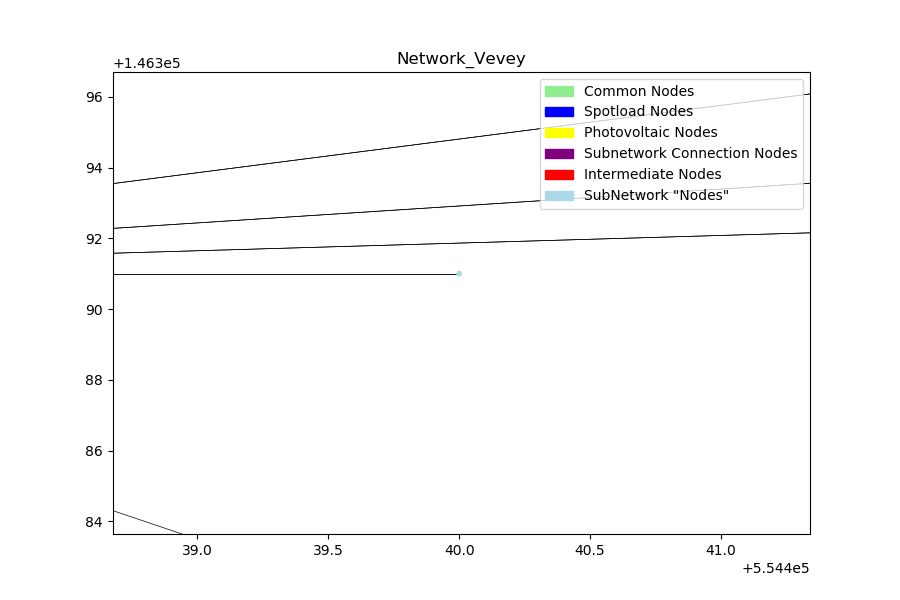

In [30]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(1, figsize=(9.0, 6.0))
nx.draw_networkx(DG, pos,width=0.5, node_color=values, with_labels=False,node_size=size)
#nx.draw_networkx(DG, pos, node_color=values, with_labels=False,node_size=0.5)
plt.title('Network_Vevey')
#plt.ylim((145400, 146800))
#plt.xlim((553500, 554500))

lightgreen = mpatches.Patch(color="lightgreen", label='Common Nodes')
blue = mpatches.Patch(color="blue", label='Spotload Nodes')
yellow = mpatches.Patch(color="yellow", label='Photovoltaic Nodes')
purple = mpatches.Patch(color="purple", label='Subnetwork Connection Nodes')
red = mpatches.Patch(color="red", label ='Intermediate Nodes')
lightblue = mpatches.Patch(color="lightblue", label ='SubNetwork "Nodes"')
plt.legend(handles=[ lightgreen, blue, yellow, purple, red, lightblue])


plt.savefig('vevey_network.svg', format="svg")

plt.show()

### What am I doing? ###
#
# Draw graph, with attribut of the pos (coordinates) and the node_color

In [31]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
#plt.figure(2, figsize=(9.0, 6.0))

#nx.draw_networkx(DG,pos, with_labels=False)
#plt.title('Guttenberg_Vevey')
#plt.ylim((280000, 720000))
#plt.xlim((780000, 920000))
#plt.show()

### What am I doing? ###
#
# Second draw of the intervall that is not to be considered, to check if "wrong" nodes appear.